# `NGO` - Clustering Countries based on Socio-Economic Factors

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

### Business Problem
Our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most.

#### Approach:

The below steps will be followed:
1. Importing Libraries
2. Reading and Inspecting the Dataset
3. Exploratory Data Analysis
4. Data preparation
5. Modelling and evaluation
6. Business Recommendations

## Importing Libraries

In [175]:
import numpy as np
from numpy.random import uniform
import pandas as pd
from random import sample
from math import isnan

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

import warnings
warnings.filterwarnings('ignore')

## Reading and Inspecting dataset

In [2]:
#Reading dataset
df = pd.read_csv('country.csv')

In [3]:
#Glance at the data
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Shape of the data
df.shape

(167, 10)

In [5]:
#Information of the columns in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


There are no null columns, no null value treatment will be required.

In [6]:
#Description of the numerical columns
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
#Converting 'export','import','health' to their absolute values instead of percentages for better analysis
df['health'] = (df['health']*df['gdpp'])/100
df['exports'] = (df['exports']*df['gdpp'])/100
df['imports'] = (df['imports']*df['gdpp'])/100

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [8]:
len(df['country'].unique())

167

Seems like there are no duplicate countries since the no. of unique values of country  match the number of rows in the dataset.

## Exploratory Data Analysis

### Univariate Analysis

In [65]:
#Function for univariate Analysis of numerical columns
def uni_num(col):
    print('*'*30,'\n\t',col,'\n','*'*28)
    print(df[col].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99]))
    
    #Plots
    plt.figure(figsize=(15,6))
    
    #Boxplot
    plt.subplot(1,2,1)
    sns.boxplot(df[col], color='cyan')
    plt.title('Boxplot for '+col)
    plt.xlabel(' ')
    
    #Distribution plot
    plt.subplot(1,2,2)
    sns.distplot(df[col])
    plt.title('Distribution plot for '+col)
    plt.xlabel(' ')
    
    plt.show()

****************************** 
	 child_mort 
 ****************************
count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
90%      100.220000
95%      116.000000
99%      153.400000
max      208.000000
Name: child_mort, dtype: float64


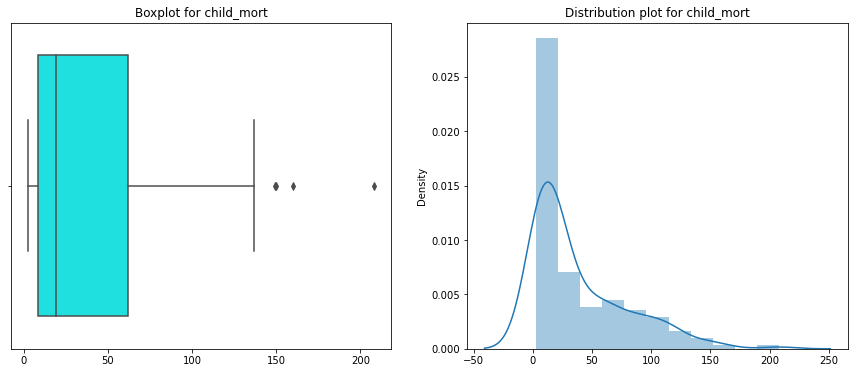

In [66]:
uni_num('child_mort')

- There are some outliers.
- The data seems consistent with the description.

****************************** 
	 exports 
 ****************************
count       167.000000
mean       7420.618847
std       17973.885795
min           1.076920
25%         447.140000
50%        1777.440000
75%        7278.000000
90%       17760.600000
95%       31385.100000
99%       64794.260000
max      183750.000000
Name: exports, dtype: float64


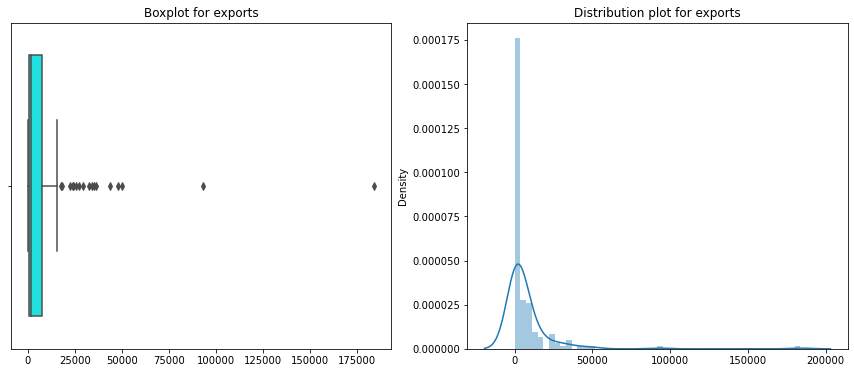

In [67]:
uni_num('exports')

- There seems to be a couple of datapoints which are extremely high.
- Many other datapints are also being recognized as outliers in the above plots

****************************** 
	 health 
 ****************************
count     167.000000
mean     1056.733204
std      1801.408906
min        12.821200
25%        78.535500
50%       321.886000
75%       976.940000
90%      3825.416000
95%      4966.701000
99%      8410.330400
max      8663.600000
Name: health, dtype: float64


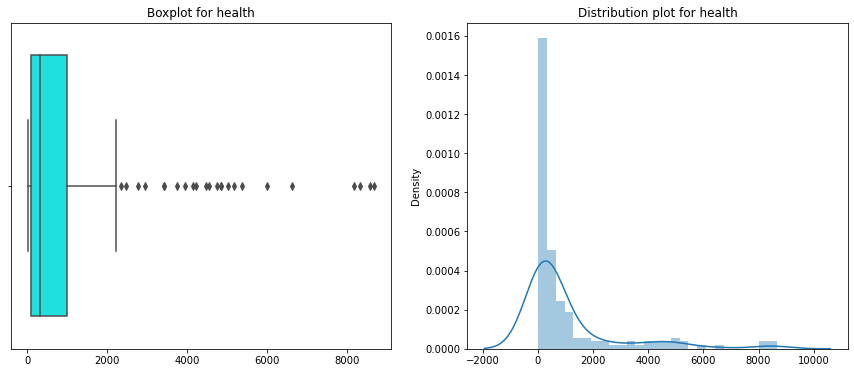

In [68]:
uni_num('health')

- There seems to be many outliers in this variable
- There is huge diffeerence between 75th and 90th percentile

****************************** 
	 imports 
 ****************************
count       167.000000
mean       6588.352108
std       14710.810418
min           0.651092
25%         640.215000
50%        2045.580000
75%        7719.600000
90%       15034.280000
95%       24241.560000
99%       55371.390000
max      149100.000000
Name: imports, dtype: float64


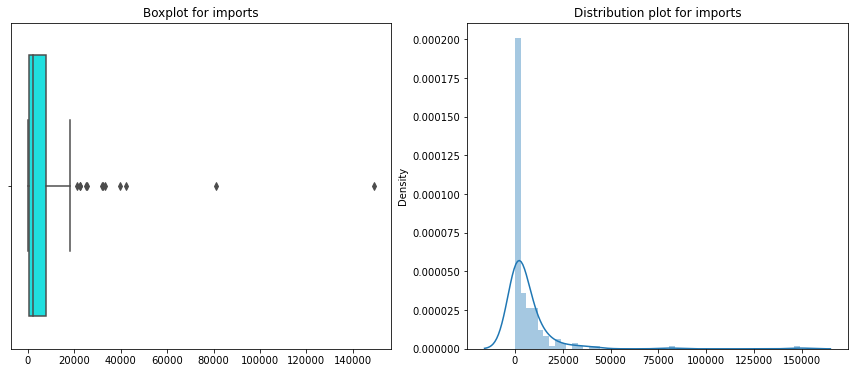

In [69]:
uni_num('imports')

- There seems to be some outliers in this data
- The outlier pattern in this variable seems to similar as that of `exports` column with a couple of extremely high values.

****************************** 
	 inflation 
 ****************************
count    167.000000
mean       7.781832
std       10.570704
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.750000
90%       16.640000
95%       20.870000
99%       41.478000
max      104.000000
Name: inflation, dtype: float64


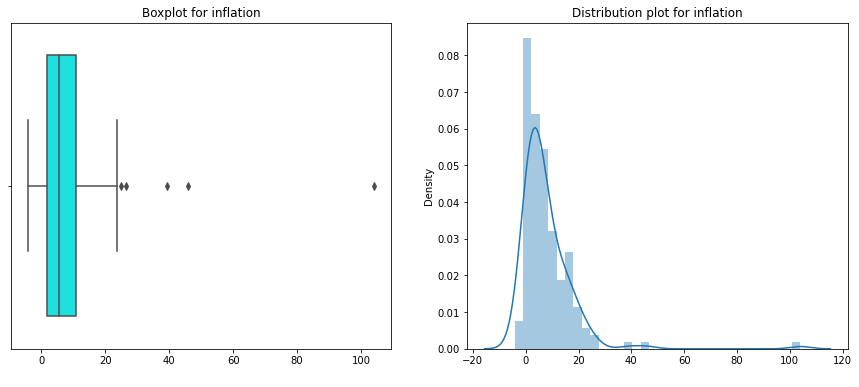

In [70]:
uni_num('inflation')

- Some points can be spotted as outliers in this variable
- The difference between 99th and 100th percentile is extremely high.

****************************** 
	 life_expec 
 ****************************
count    167.000000
mean      70.555689
std        8.893172
min       32.100000
25%       65.300000
50%       73.100000
75%       76.800000
90%       80.400000
95%       81.400000
99%       82.370000
max       82.800000
Name: life_expec, dtype: float64


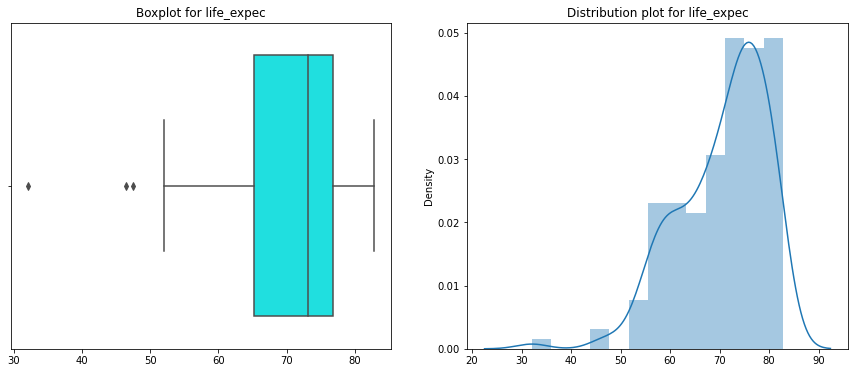

In [71]:
uni_num('life_expec')

- There seems to be some outliers in the lower quantiles

****************************** 
	 total_fer 
 ****************************
count    167.000000
mean       2.947964
std        1.513848
min        1.150000
25%        1.795000
50%        2.410000
75%        3.880000
90%        5.322000
95%        5.861000
99%        6.563600
max        7.490000
Name: total_fer, dtype: float64


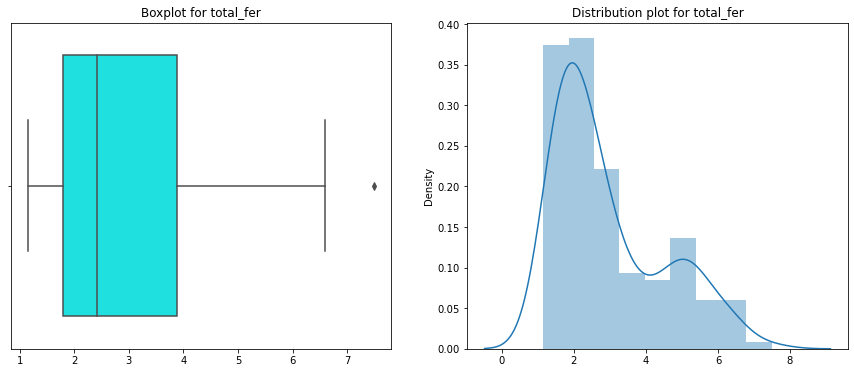

In [72]:
uni_num('total_fer')

- There seems to be a single datapoint as an outlier in this varaible

****************************** 
	 gdpp 
 ****************************
count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
90%       41840.000000
95%       48610.000000
99%       79088.000000
max      105000.000000
Name: gdpp, dtype: float64


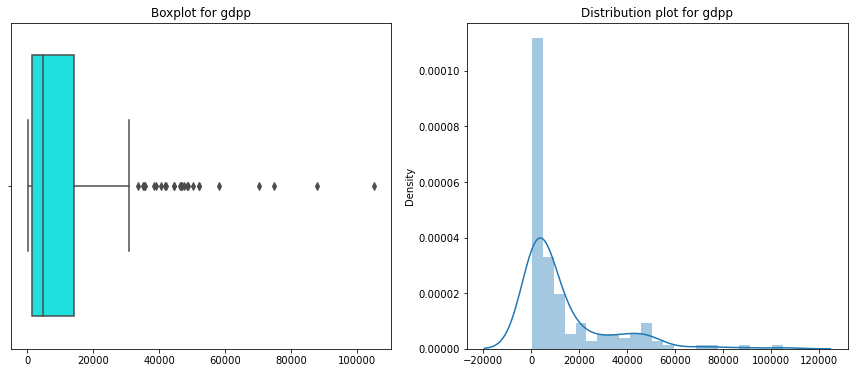

In [73]:
uni_num('gdpp')

- There seems to be many outliers in this variable

#### Outlier Treatment
From the above plots we can observe that all the variables have outliers. Based on the business problem, it would be a better decision to avoid outlier treatment. By treating outliers there's a chance that we might remove some countries which will be needing financial assistance more than the others. 


While no outlier treatment is being done, the existence of outliers will be kept in mind and taken into consideration while modelling so as to build a robust model.

#### Scaling Dataset
None of the variables seem to be of normal distribution, also the scale of values is varying. Since we will be using algorithms which compute the distances, it would be a wise decision to bring all the values in the same scale. 


Standardization will be done on the columns before modelling based on the above findings.

### Bivariate Analysis

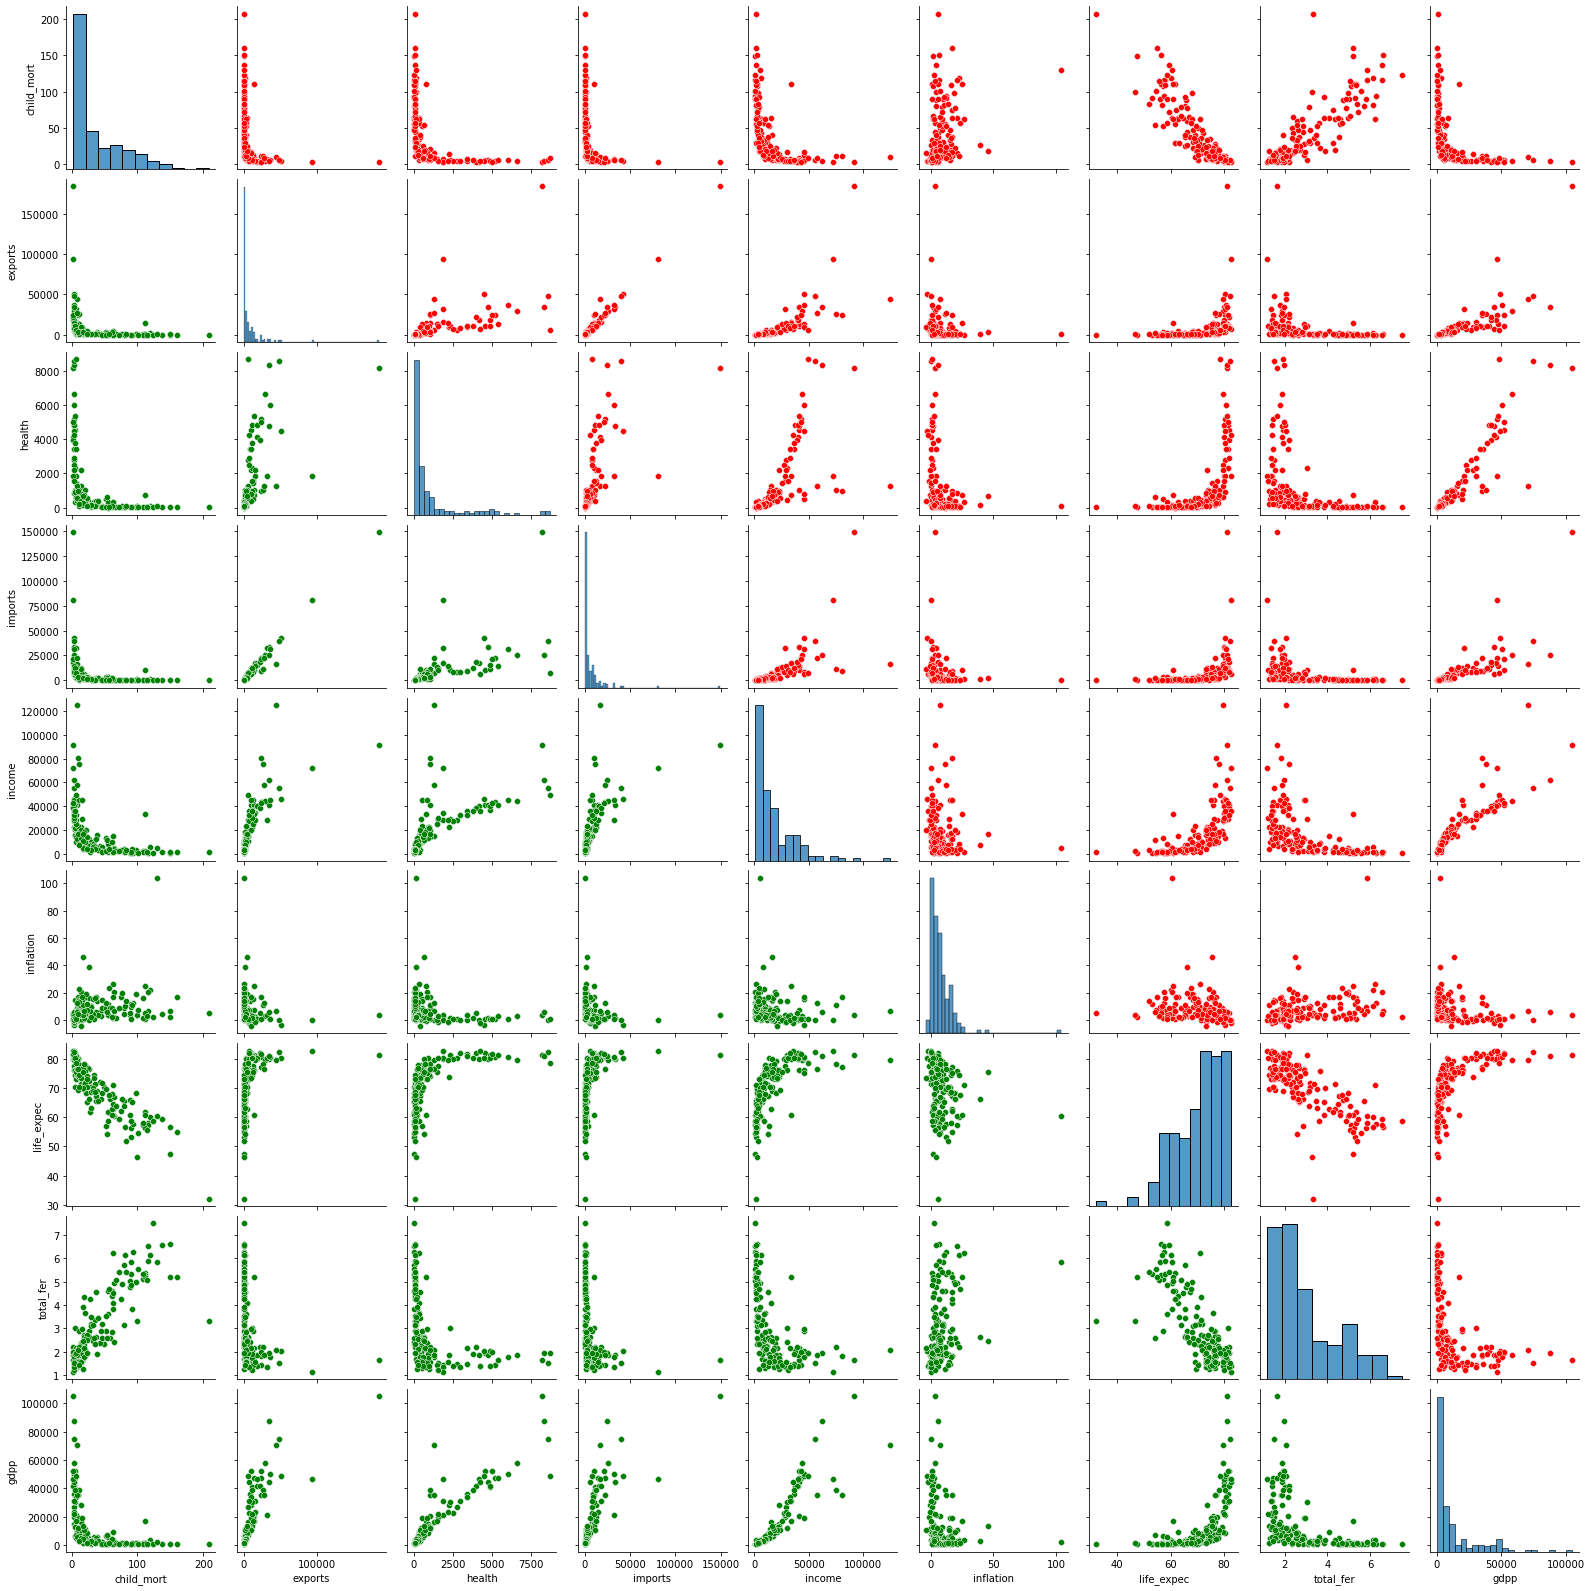

In [79]:
p = sns.pairplot(df)
p.map_upper(sns.scatterplot, color='red')
p.map_lower(sns.scatterplot, color='green')
p.map_diag(sns.distplot)

## Data Preparation

In [81]:
#Dropping 'countries' column since it's labeled and works as an identifier
df_final = df.drop('country', axis=1)
df_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [84]:
#Scaling the variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

#Converting to dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df_final.columns)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


Before applying clustering algorithms, it's necessary to check the clustering tendency of the dataset. This will be done with the help of __Hopkins Test__.


Using __Hopkins Test__ we can determine how much teh data is different from uniform distribution.

In [86]:
#Function for hopkins test
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [87]:
hopkins(df_scaled)

0.951847544135967

A score of 95% is considered to be excellent for clustering. Hence, we can proceed with building our model.

## Model Building

### Hierarchical Clustering

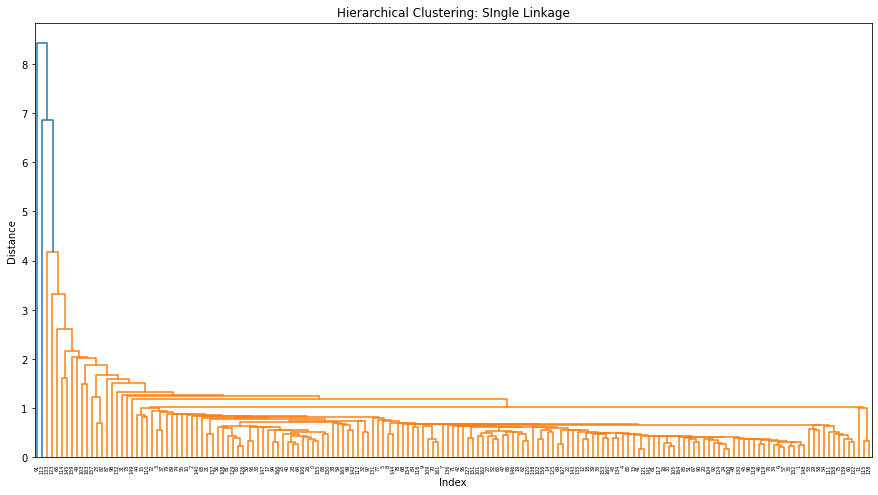

In [96]:
#Single Linkage: Checking for minimum distance between two points of two different clusters
plt.figure(figsize=(15,8))
mergings_single = linkage(df_scaled, method='single')
plt.title('Hierarchical Clustering: Single Linkage')
plt.ylabel('Distance')
plt.xlabel('Index')
dendrogram(mergings_single)
plt.show()

We don't seem to get good enough results with __Single Linkage__. Let's try with __Complete Linkage__.

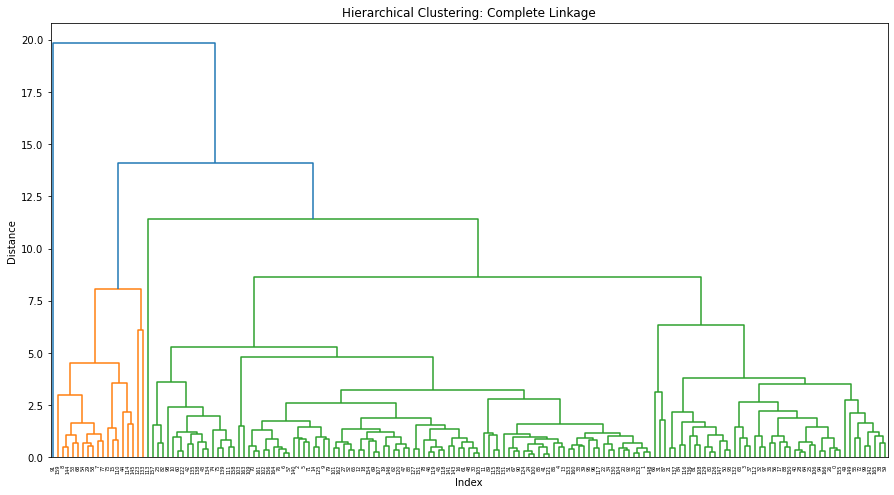

In [97]:
#Complete Linkage: Checking for maximum distance between two points of two different clusters
plt.figure(figsize=(15,8))
mergings_complete = linkage(df_scaled, method='complete')
plt.title('Hierarchical Clustering: Complete Linkage')
plt.ylabel('Distance')
plt.xlabel('Index')
dendrogram(mergings_complete)
plt.show()

The results from __Complete Linkage__  show good results. Based on the above dendrogram, we can try `3` and `4` clusters.


Model will be built with both the number of clusters and evaluated.

In [137]:
#Copying original dataframe and appending labels with both number of clusters
h_df = df.copy()
h_df['clusters_3'] = cut_tree(mergings_complete, n_clusters = 3).reshape(-1)
h_df['clusters_4'] = cut_tree(mergings_complete, n_clusters = 4).reshape(-1)

h_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_3,clusters_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


#### Analysis of both the cluster sets

We will compare our clusters based on 3 columns:
- `gdpp`
- `income`
- `child_mort`


The above decision is based on the business recommendations.

In [210]:
def cluster_analysis(cluster_num, data):
    cols = ['gdpp','income','child_mort']
    temp = 1
    plt.figure(figsize=(15,8))
    for i in cols:
        plt.subplot(1,3,temp)
        plt.title(cluster_num+': '+i)
        sns.boxplot(x=cluster_num, y=i, data=data)
        plt.xlabel('clusters')
        plt.ylabel(' ')
        temp+=1
    plt.show()
    print('Observations in '+cluster_num+':\n'+'*'*27)
    print(data[cluster_num].value_counts())

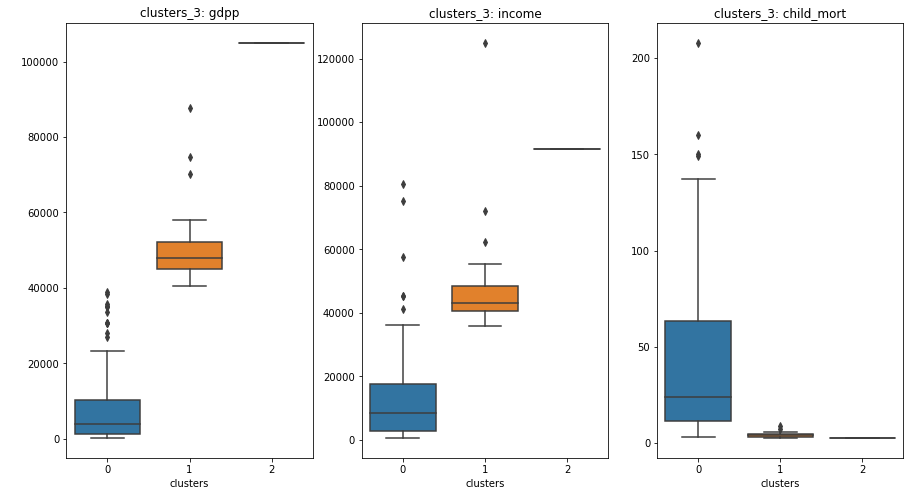

Observations in clusters_3:
***************************
0    148
1     18
2      1
Name: clusters_3, dtype: int64


In [211]:
cluster_analysis('clusters_3', data=h_df)

`clusters_3` seem to explain different varaince in each of it's cluster for `gdpp` and `income`.

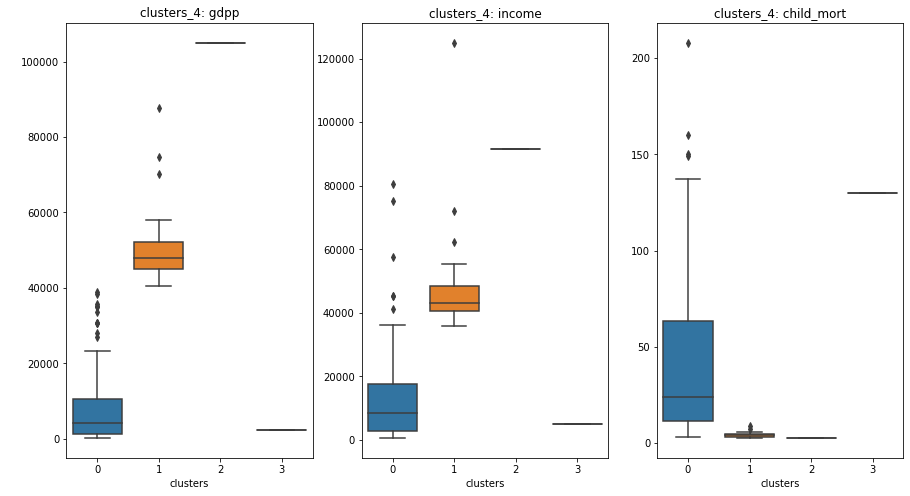

Observations in clusters_4:
***************************
0    147
1     18
3      1
2      1
Name: clusters_4, dtype: int64


In [212]:
cluster_analysis('clusters_4', data=h_df)

Results fro `clusters_4` seem to be similar to `clusters_3` except 1 extra cluster having a single country.

From the above visualizations, it seems that cluster 0 (and cluster 3 in the case of 4 clusters) has low GDP and Income Rate. This cluster also seems to have the highest child mortality.


This cluster could be considered as the underdeveloped segment. Further analysis wil be done by grouping and taking the median(since the variability is high) based on each clustering group.

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters_3,,,,,,,,,
0,24.1,1389.79,227.482,1564.035,8510,5.9350,71.30,2.60,3885
1,4.2,24064.95,4840.100,19673.700,43050,1.0205,80.85,1.87,47900
2,2.8,183750.00,8158.500,149100.000,91700,3.6200,81.30,1.63,105000


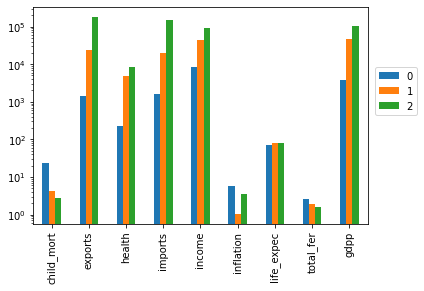

In [173]:
#Grouping on 'clusters_3'
h_df.groupby('clusters_3').median().drop('clusters_4', axis=1).T.plot(kind='bar', logy=True)
plt.legend(loc=(1.02,0.5))
h_df.groupby('clusters_3').median().drop('clusters_4', axis=1)

Cluster 0 has the below observations compared to other clusters:
- Low gdp, income, exports, imports and health values
- High inflation and child mortality


This confirms that cluster 0 is the segment of underdeveloped countries.

In [155]:
#Checking for values in cluster number 2 in 3 clusters segmentation
h_df[h_df['clusters_3']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_3,clusters_4
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,2,2


We can consider the values of cluster 1 and 2 as a single segment of relatively developed countries.

In [156]:
#Checking underdeveloped countries list
h_df[h_df['clusters_3']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_3,clusters_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,0,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,0,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,0,0
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,0,0


In [158]:
#Percentages of clusters
h_df['clusters_3'].value_counts(normalize=True)*100

0    88.622754
1    10.778443
2     0.598802
Name: clusters_3, dtype: float64

While the cluster averages show satisfactory values, the list for underdeveloped country is really huge constituting 88.6% of all countries. With such results we will not be able to decide the most optimum results for our business objective.


We will try clustering with __`K-Means`__ algorithm and compare the results for the most optimum recommendations.

### K-Means

#### Getting optimum `K` value

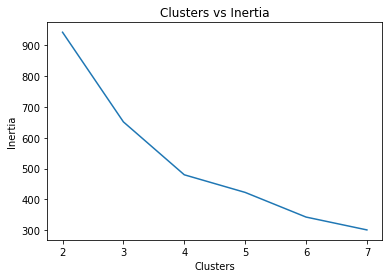

In [191]:
#By checking the inertia(sum of squared error) values
clusters = [2,3,4,5,6,7]
inertia = []
for i in clusters:
    model = KMeans(n_clusters=i)
    model.fit(df_scaled)
    inertia.append(model.inertia_)

plt.plot(inertia)
plt.xticks(ticks=range(len(clusters)), labels=[str(i) for i in clusters])
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Clusters vs Inertia')
plt.show()

In [192]:
#By checking the silhouette score
clusters=[2,3,4,5,6,7]

for i in clusters:
    model=KMeans(n_clusters=i)
    model.fit(df_scaled)
    labels = model.labels_
    print('For',i,'clusters, silhouette score is',silhouette_score(df_scaled,labels))

For 2 clusters, silhouette score is 0.45863306035476264
For 3 clusters, silhouette score is 0.4218615812599681
For 4 clusters, silhouette score is 0.4277518271600435
For 5 clusters, silhouette score is 0.4324001169216119
For 6 clusters, silhouette score is 0.3174156417229116
For 7 clusters, silhouette score is 0.31136565295133073


From the above, we can see that the optimum number of clusters seem to be `3`, `4` or `5`.


Analysis for both will be done and most optimum number of clusters will be decided based upon the observations.

#### Applying n_clusters

In [201]:
#Dataframe copy for KMeans cluster labels analysis
k_df = df.copy()

In [233]:
#Building model with 3 clusters
model_3 = KMeans(n_clusters=3, max_iter=50, random_state=100)
model_3.fit(df_scaled)
k_df['clusters_3'] = model_3.labels_

In [207]:
#Building model with 4 clusters
model_4 = KMeans(n_clusters=4, max_iter=50, random_state=100)
model_4.fit(df_scaled)
k_df['clusters_4'] = model_4.labels_

In [208]:
#Building model with 5 clusters
model_5 = KMeans(n_clusters=5, max_iter=50, random_state=100)
model_5.fit(df_scaled)
k_df['clusters_5'] = model_5.labels_

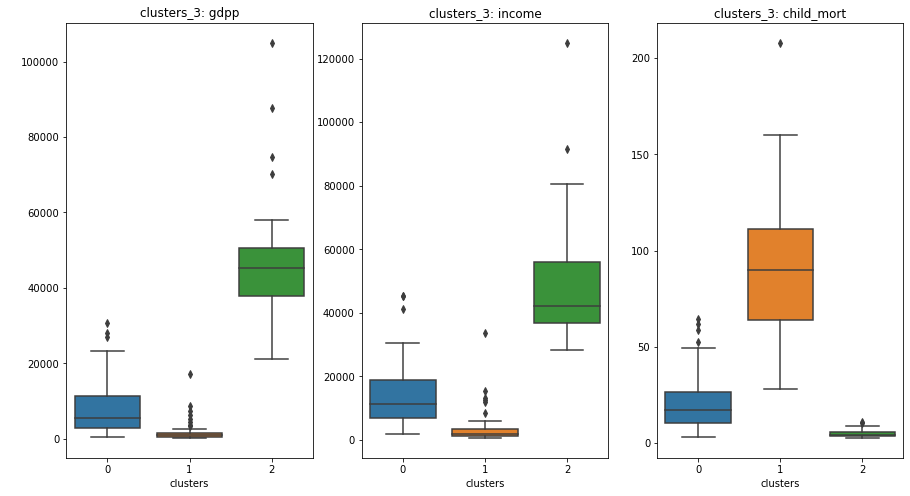

Observations in clusters_3:
***************************
0    91
1    48
2    28
Name: clusters_3, dtype: int64


In [213]:
#Analysis of 3 clusters segmentation
cluster_analysis('clusters_3', data=k_df)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters_3,,,,,,,,,
0,17.20,1806.92,365.6800,2364.930,11200,5.140,74.1,2.170,5450
1,89.75,196.26,51.6135,339.306,1860,8.855,59.8,5.055,932
2,4.25,23925.95,4349.2900,17494.400,42150,1.395,80.6,1.865,45350


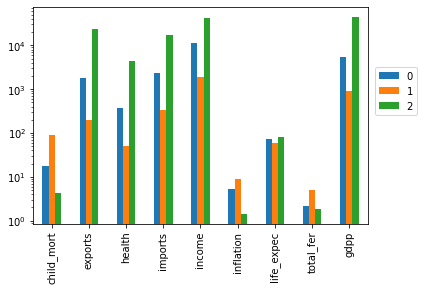

In [216]:
#Grouping on 'clusters_3'
k_df.groupby('clusters_3').median().drop(['clusters_4','clusters_5'], axis=1).T.plot(kind='bar', logy=True)
plt.legend(loc=(1.02,0.5))
k_df.groupby('clusters_3').median().drop(['clusters_4','clusters_5'], axis=1)

Cluster 1 seems to be the segment of underdeveloped countries due to the below facts:
- High child mortality and inflation
- Low exports, health, income budget and low life expectancy and GDP


The no. of observations in the clusters also makes sense for our business objective. This model shows by far the best segmentation.

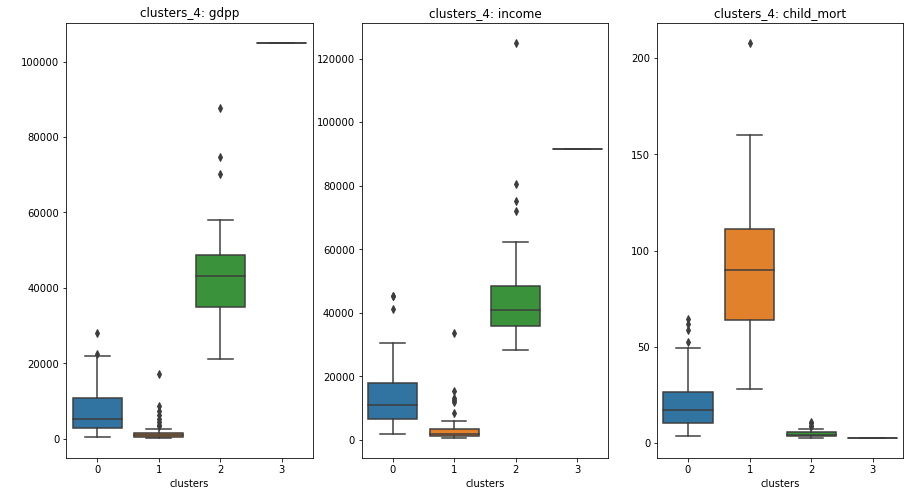

Observations in clusters_4:
***************************
0    88
1    48
2    30
3     1
Name: clusters_4, dtype: int64


In [214]:
#Analysis of 4 clusters segmentation
cluster_analysis('clusters_4', data=k_df)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters_4,,,,,,,,,
0,17.40,1779.81,341.1910,2326.815,11000,5.575,73.95,2.170,5245
1,89.75,196.26,51.6135,339.306,1860,8.855,59.80,5.055,932
2,4.25,20127.00,4036.7500,16119.600,40900,1.190,80.45,1.865,43150
3,2.80,183750.00,8158.5000,149100.000,91700,3.620,81.30,1.630,105000


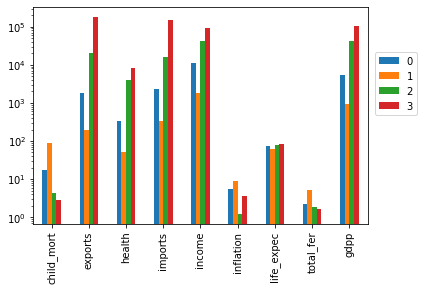

In [217]:
#Grouping on 'clusters_4'
k_df.groupby('clusters_4').median().drop(['clusters_3','clusters_5'], axis=1).T.plot(kind='bar', logy=True)
plt.legend(loc=(1.02,0.5))
k_df.groupby('clusters_4').median().drop(['clusters_3','clusters_5'], axis=1)

In [221]:
k_df[k_df['clusters_4']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_3,clusters_4,clusters_5
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,2,3,1


- 1 country segmeneted as a different category (cluster no. `3`) seems to come under the developed countries segment based on it's high income and GDP values, it will be considered as such.
- cluster `1` seems to be the segment of underdeveloped countries due to the below facts:
    - High Child Mortality, inflation and total fertility.
    - Low exports, health, import budget and low income and GDP.

- The number of values in cluster `1` in 4-clustered segmentation is same as 3-clustered segmentation.

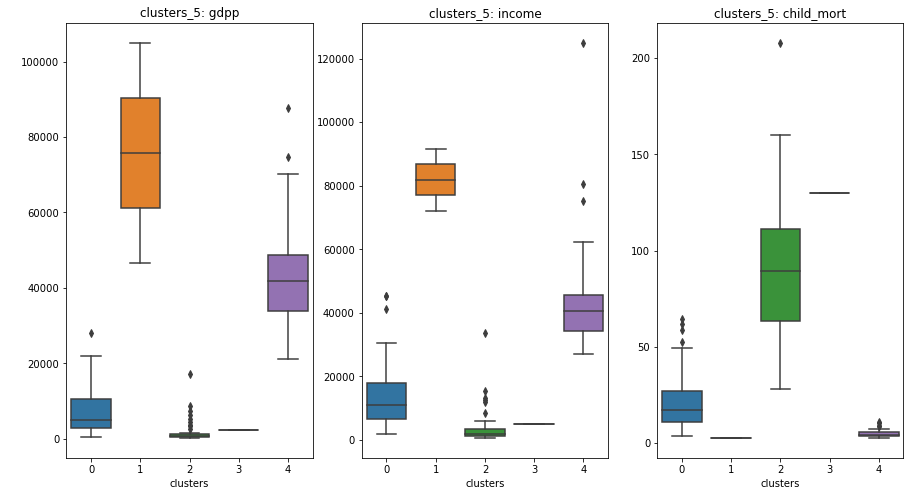

Observations in clusters_5:
***************************
0    87
2    47
4    30
1     2
3     1
Name: clusters_5, dtype: int64


In [215]:
#Analysis of 5 clusters segmentation
cluster_analysis('clusters_5', data=k_df)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters_5,,,,,,,,,
0,17.40,1779.730,338.990,2321.280,10900,5.710,73.9,2.170,5080
1,2.80,138475.000,5001.930,115092.000,81900,1.787,82.0,1.390,75800
2,89.30,196.176,50.958,324.912,1850,8.790,59.5,5.050,897
3,130.00,589.490,118.131,405.420,5150,104.000,60.5,5.840,2330
4,4.25,17780.400,4036.750,15113.200,40550,1.190,80.4,1.865,41850


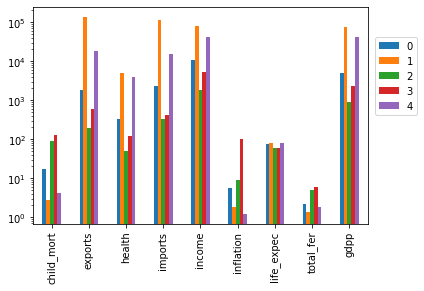

In [218]:
#Grouping on 'clusters_5'
k_df.groupby('clusters_5').median().drop(['clusters_4','clusters_3'], axis=1).T.plot(kind='bar', logy=True)
plt.legend(loc=(1.02,0.5))
k_df.groupby('clusters_5').median().drop(['clusters_4','clusters_3'], axis=1)

In [222]:
k_df[k_df['clusters_5']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_3,clusters_4,clusters_5
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330,1,1,3


In [223]:
k_df[k_df['clusters_5']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_3,clusters_4,clusters_5
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000,2,3,1
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600,2,2,1


- Cluster no. `1` seems to constitute developed countries, whereas cluster no. `3` has only Nigeria which seems to be underdeveloped, based on it's extremely high inflation and low income and GDP.
- Cluster no. `2` seems to constitute underdeveloped countries based on:
    - High child mortality and inflation
    - Low income, GDP and import, export and health budget.

#### Final Results:

The clustering of underdeveloepd countries seem to be similar in all the 3 segmentation results. 


We will continue with __`3-clustered segmentation with KMeans`__ as our final result and continue to analyze with it.

In [238]:
#Dropping 'clusters_4' and 'clusters_5' since those labels are of no use
final_df = k_df.drop(['clusters_4','clusters_5'], axis=1)
final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


By observing the values above, the clusters can be renamed as:
- `Cluster 0` : Developing countries
- `Cluster 1` : Underdeveloped countries
- `Cluster 2` : Developed countries

In [239]:
#Renaming cluster values
final_df['clusters_3'] = final_df['clusters_3'].map({0:'developing',1:'underdeveloped',2:'developed'})

#Renaming the column
final_df = final_df.rename(columns={'clusters_3':'country_status'})

In [240]:
final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_status
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,underdeveloped
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,developing
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,developing
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,underdeveloped
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,developing


In [246]:
#Filtering based on the underdeveloped status
underdeveloped_df = final_df[final_df['country_status'] == 'underdeveloped']

#Filtering based on the business suggestions of using just the below 3 columns for final decision
underdeveloped_df = underdeveloped_df[['country','gdpp','income','child_mort']].sort_values(['gdpp','income','child_mort'], ascending=[True,True,False])

In [256]:
#Description of the underdeveloped countries
underdeveloped_df.describe()

,gdpp,income,child_mort
count,48.000000,48.000000,48.000000
mean,1909.208333,3897.354167,91.610417
std,2925.911009,5590.168621,34.319855
min,231.000000,609.000000,28.100000
25%,551.500000,1390.000000,63.675000
50%,932.000000,1860.000000,89.750000
75%,1465.000000,3522.500000,111.000000
max,17100.000000,33700.000000,208.000000


Based on the above results, further filtering can be done to decide the top countries.


We will filter based on the average(mean) values and sort them to get the final list.

In [268]:
filtered_df = underdeveloped_df[(underdeveloped_df['gdpp'] < 1909) & (underdeveloped_df['income'] < 3897) & (underdeveloped_df['child_mort'] > 91)].sort_values(['gdpp','income','child_mort'], ascending=[True,True,False])
filtered_df

,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
106,Mozambique,419,918,101.0
31,Central African Republic,446,888,149.0
64,Guinea-Bissau,547,1390,114.0
25,Burkina Faso,575,1430,116.0
63,Guinea,648,1190,109.0
66,Haiti,662,1500,208.0


## Business Recommendations

The final results are interpreted after sorting them from _lowest to highest_ __GDP__, then __Income__ and then from _highest to lowest_ of __Child Mortality__


Based on the final analysis results, the below __`10 countries`__ need the top most attention:
1. Burundi
2. Congo, Dem. Rep.
3. Niger
4. Sierra Leone
5. Mozambique
6. Central African Republic
7. Guinea-Bissau
8. Burkina Faso
9. Guinea
10. Haiti

By providing the required assistance in the above countries, based on the budget remaining, the next set of countries which would require financial aid are:

1. Mali
2. Benin
3. Chad
4. Lesotho
5. Mauritania
6. Cote d'Ivoire
7. Cameroon